# Ford GoBike System Data
## by Hanin Lutfi Falatah

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. this reserch is in the time peroied from 06/2017 to 01/2018.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### Data Garthring

In [2]:
df_bike=pd.read_csv('2017-fordgobike-tripdata.csv',sep=';')
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 41.6+ MB


### What is the structure of your dataset?

> There are 519700 rows and 13 column in the DataFrame, 8 of the 13 column are numerical data, some of the data should be timestap like start_time, and end_timeand the others like geographic points the longitude point and latitude point, and rented bikes id.

### What is/are the main feature(s) of interest in your dataset?

> The main feature is the trip duration. where are the bikes that are most rentad, when are the most rentad.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The duration, user type, start date, end date, start location, end location, day of week all of those features may effect on the duration.

In [4]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 41.6+ MB


In [5]:
df_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [6]:
df_bike.duplicated().sum()

0

In [7]:
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


**the issues:**
- the start_date, end_date data type should be timestamp

- Convert the duration_sec from seconds to minutes and hours

- divide the start_time into two column as the start_date and start_time

- divide the end_time into two column as end_date and end_time

- use start_date, end_date to obtain the day and the month

- calculate the distance between the station

### Cleaning

In [8]:
df_bike_clean = df_bike.copy()

**Define**

- the start_date, end_date data type should be timestamp.

**Code**

In [9]:
df_bike_clean.start_time = pd.to_datetime(df_bike_clean.start_time)
df_bike_clean.end_time = pd.to_datetime(df_bike_clean.end_time)
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 45.6+ MB


**Define**

- Convert the duration_sec from seconds to minutes and hours.

**Code**

In [10]:
df_bike_clean['duration_min']=(df_bike_clean.duration_sec/60).astype(float)
df_bike_clean['duration_hr']=(df_bike_clean.duration_min/60).astype(float)

**Test**

In [11]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
duration_min               519700 non-null float64
duration_hr                519700 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(4), object(3)
memory usage: 53.5+ MB


**Define**

- use start_date to obtain the month, month by names, weekday by names, and the day 


**Code**

In [12]:
# month number
df_bike_clean['start_month'] = pd.to_datetime(df_bike_clean.start_time).dt.month
# month name
df_bike_clean['start_month_name'] = pd.to_datetime(df_bike_clean.start_time).dt.strftime('%B')

In [13]:
#  day
df_bike_clean['start_day'] = pd.to_datetime(df_bike_clean.start_time).dt.day
#  weekday
df_bike_clean['start_weekday'] = pd.to_datetime(df_bike_clean.start_time).dt.strftime('%A')

In [14]:
# Hour
df_bike_clean['start_hour']= pd.to_datetime(df_bike_clean.start_time).dt.strftime('%H')

**Test**

In [15]:
df_bike_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,duration_hr,start_month,start_month_name,start_day,start_weekday,start_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335.166667,22.252778,12,December,31,Sunday,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313.333333,21.888889,12,December,31,Sunday,15


**Define**

-  divide the start_time into two column as the start_date and start_time.

- divide the end_time into two column as end_date and end_time.

**Code**

In [16]:
# start_date
df_bike_clean['start_date'] = pd.to_datetime(df_bike_clean.start_time).dt.date
# start_time
df_bike_clean['start_time'] = pd.to_datetime(df_bike_clean.start_time).dt.time

In [17]:
# end_date
df_bike_clean['end_date'] = pd.to_datetime(df_bike_clean.end_time).dt.date
# end_time
df_bike_clean['end_time'] = pd.to_datetime(df_bike_clean.end_time).dt.time

**Test**

In [18]:
df_bike_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,duration_min,duration_hr,start_month,start_month_name,start_day,start_weekday,start_hour,start_date,end_date
0,80110,16:57:39.654000,15:12:50.245000,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Customer,1335.166667,22.252778,12,December,31,Sunday,16,2017-12-31,2018-01-01
1,78800,15:56:34.842000,13:49:55.617000,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Customer,1313.333333,21.888889,12,December,31,Sunday,15,2017-12-31,2018-01-01
2,45768,22:45:48.411000,11:28:36.883000,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,Customer,762.800000,12.713333,12,December,31,Sunday,22,2017-12-31,2018-01-01


**Define**

- calculate the distance between the station.

**Code**

In [19]:
df_bike_clean['distance'] = np.sqrt((df_bike_clean['start_station_longitude'] - df_bike_clean['end_station_longitude']) ** 2 + (df_bike_clean['start_station_latitude'] - df_bike_clean['end_station_latitude']) ** 2)

**Test**

In [20]:
df_bike_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,duration_min,duration_hr,start_month,start_month_name,start_day,start_weekday,start_hour,start_date,end_date,distance
0,80110,16:57:39.654000,15:12:50.245000,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,1335.166667,22.252778,12,December,31,Sunday,16,2017-12-31,2018-01-01,0.010575
1,78800,15:56:34.842000,13:49:55.617000,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,1313.333333,21.888889,12,December,31,Sunday,15,2017-12-31,2018-01-01,0.031792


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**1- Location**

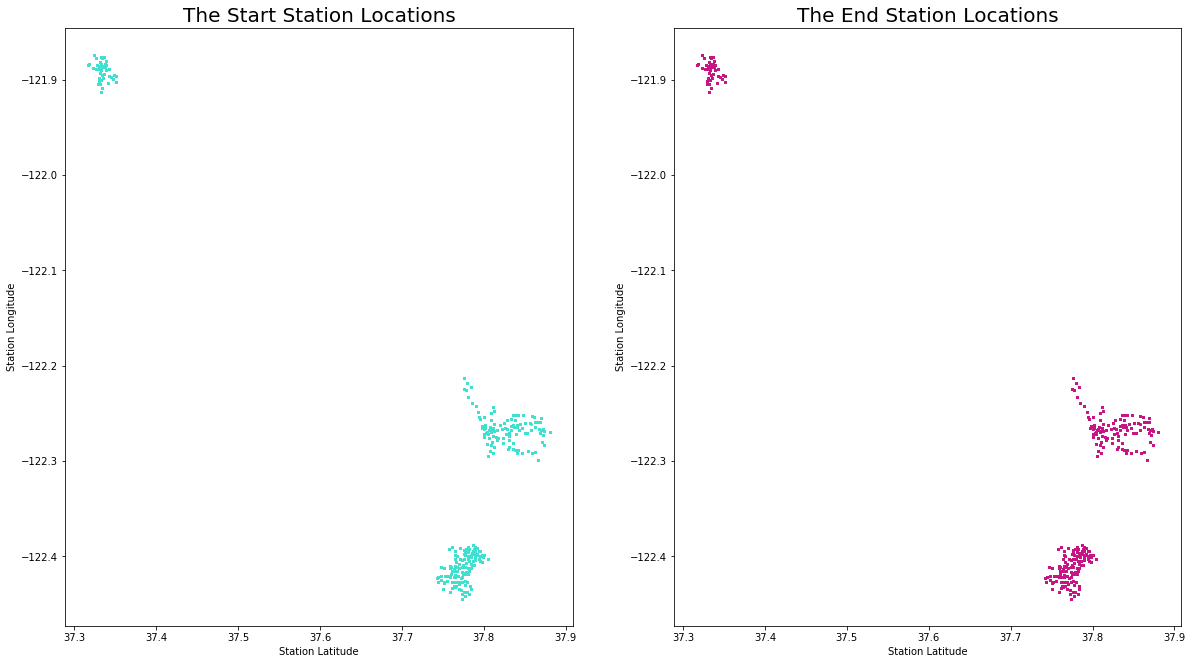

In [21]:
plt.figure(1, figsize = (20, 11))
plt.subplot(1,2,1)
plt.plot(df_bike_clean.start_station_latitude ,df_bike_clean.start_station_longitude, marker = 'o', linestyle = '', ms = 2,color ='Turquoise')
plt.title('The Start Station Locations', fontsize = 20)
plt.xlabel('Station Latitude')
plt.ylabel('Station Longitude')

plt.subplot(1, 2 , 2)
plt.plot(df_bike_clean.end_station_latitude ,df_bike_clean.end_station_longitude, marker = 'o',linestyle = '',ms = 2,color ='MediumVioletRed')
plt.title('The End Station Locations', fontsize = 20)
plt.xlabel('Station Latitude')
plt.ylabel('Station Longitude')
plt.show()

**2- Duration**

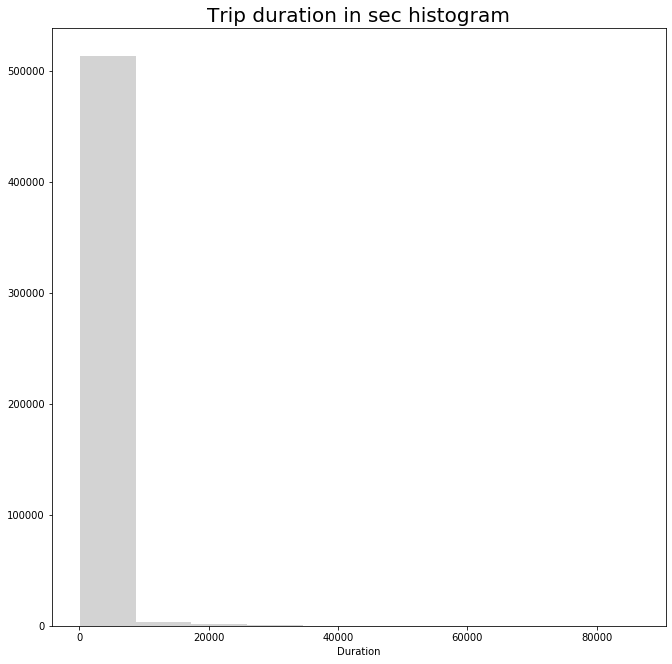

In [22]:
plt.hist(data=df_bike_clean, x='duration_sec',color='LightGrey')
plt.gcf().set_size_inches(11, 11)
plt.xlabel('Duration');
plt.title("Trip duration in sec histogram", fontsize=20)
plt.show()


This plot show that the duration distrabution is right skewed, this mean that there are outliers.

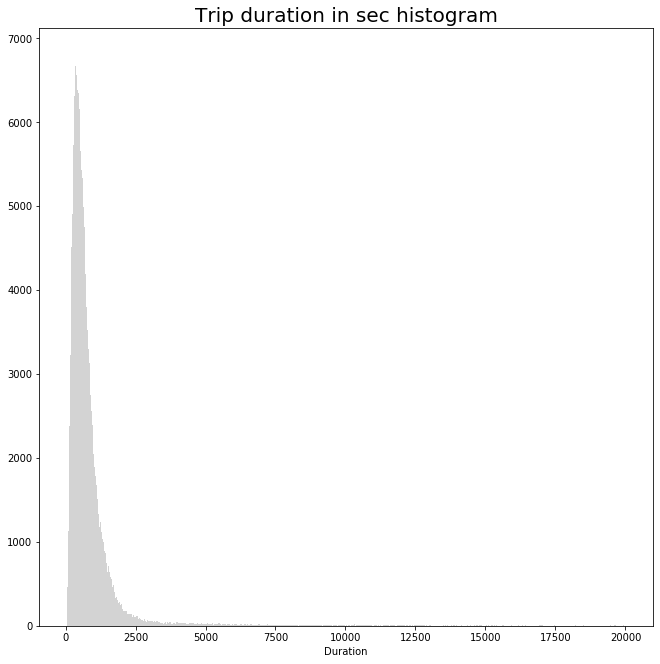

In [23]:
plt.hist(data=df_bike_clean.query('duration_sec <= 20000'), x='duration_sec', bins=2000,color= 'LightGrey')
plt.title("Trip duration in sec histogram", fontsize=20)
plt.xlabel('Duration');
plt.gcf().set_size_inches(11, 11)


This plot show still that the duration distrabution is right skewed.

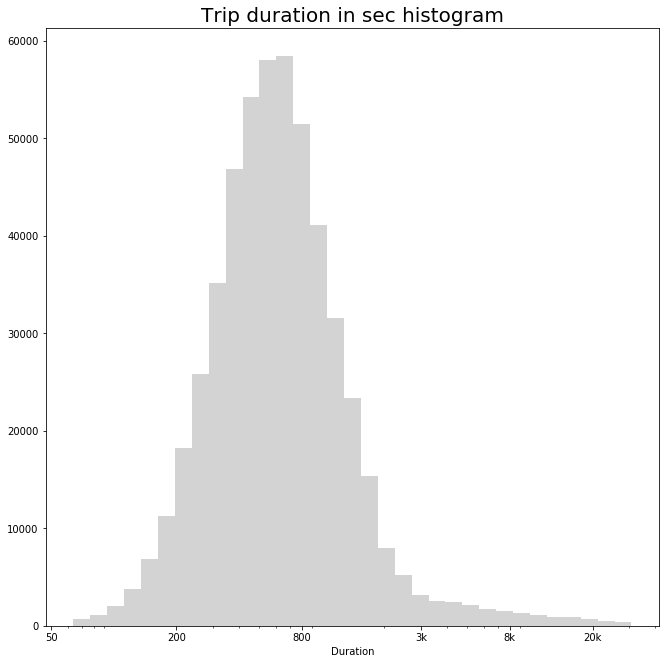

In [24]:
ticks = [50, 200, 800, 3000, 8000, 20000]
labels = [50, 200, 800, '3k','8k', '20k']
plt.hist(data=df_bike_clean, x='duration_sec', bins= 8 ** np.arange(2, 5, 0.09), color='LightGrey')
plt.title("Trip duration in sec histogram", fontsize=20)
plt.gcf().set_size_inches(11, 11)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration');

his plot show a distribution which shows that the peek is around 800.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

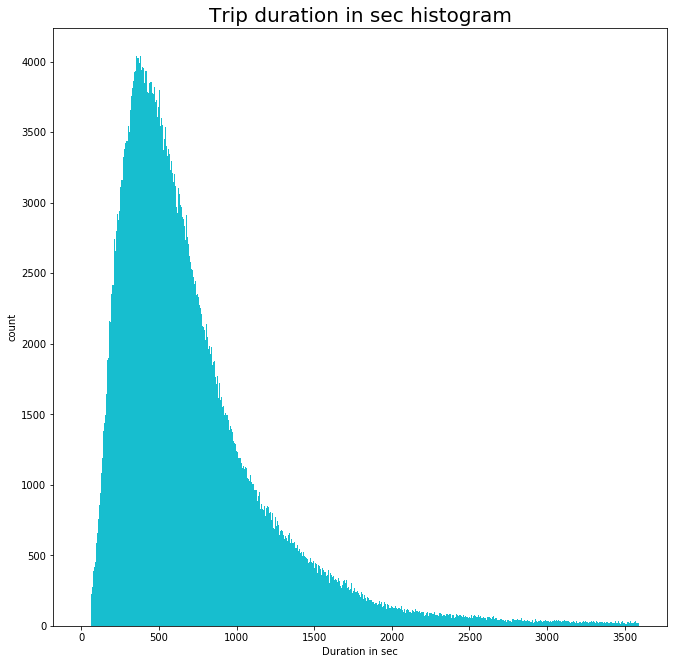

In [25]:
color = sb.color_palette()[9]

plt.hist(data = df_bike_clean, x = 'duration_sec', bins = np.arange(0, 3600, 6), color = color)
plt.gcf().set_size_inches(11, 11)
plt.title("Trip duration in sec histogram", fontsize=20)
plt.ylabel('count');
plt.xlabel('Duration in sec');

> most of the trips are 8 mintues and the avrage is 4 to 16 Mintues, and mostly the trips are short because people who closer to the stantions and thir is also close work.

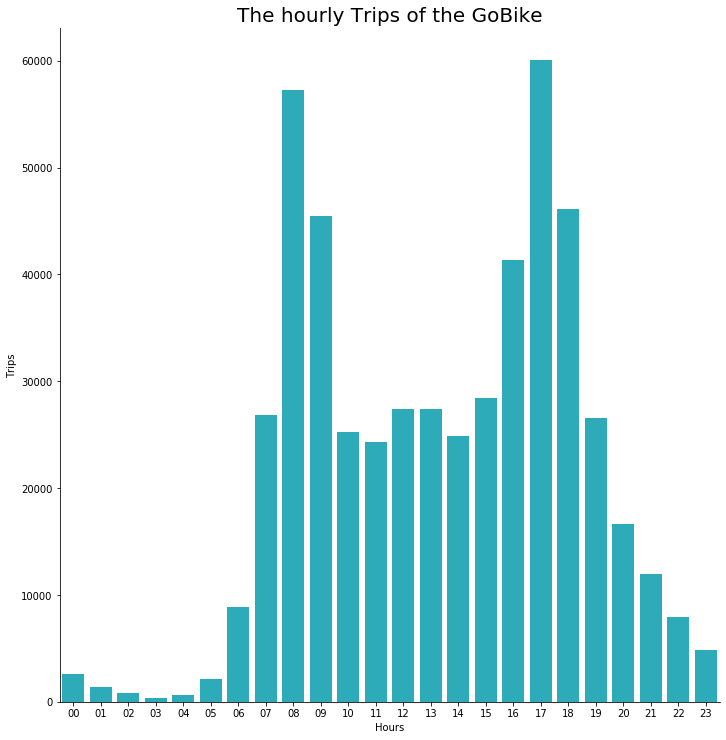

In [26]:
sb.catplot(data = df_bike_clean, x ='start_hour', kind='count', color = color);
plt.gcf().set_size_inches(11, 11)
plt.title('The hourly Trips of the GoBike',fontsize=20)
plt.xlabel('Hours');
plt.ylabel('Trips');
plt.show()

>the main times for bike rating are 8AM-9AM and 17-18 which is 5PM-6PM, and those are mosty the times people go to work or shcool and return from them.

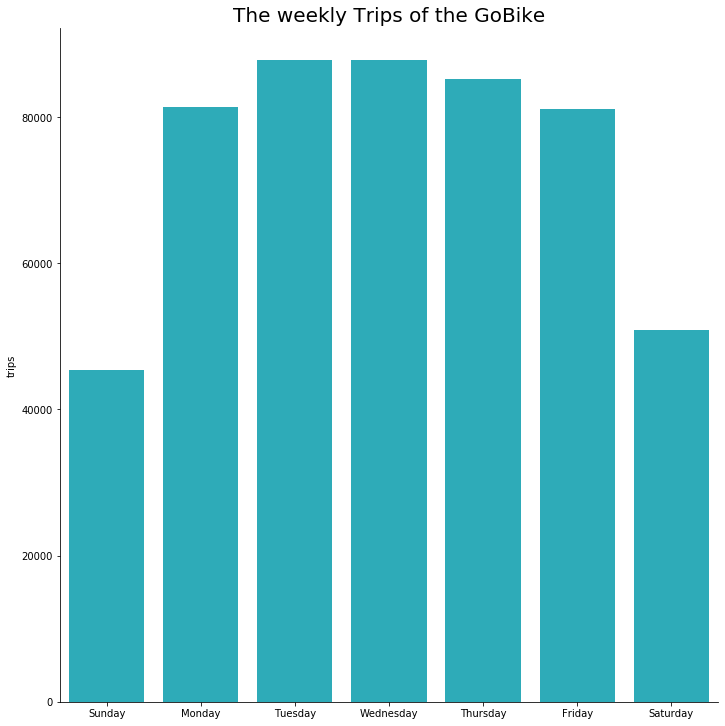

In [27]:
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.catplot(data=df_bike_clean, x='start_weekday', kind='count', color = color, order = weekday)
plt.gcf().set_size_inches(11, 11)
plt.title('The weekly Trips of the GoBike',fontsize=20)
plt.xlabel('');
plt.ylabel('trips');
plt.show()

>The plot show that the system is used for going to work or shcool, because the bike rides are mostly used for weekday, and Tuesday is the highest.

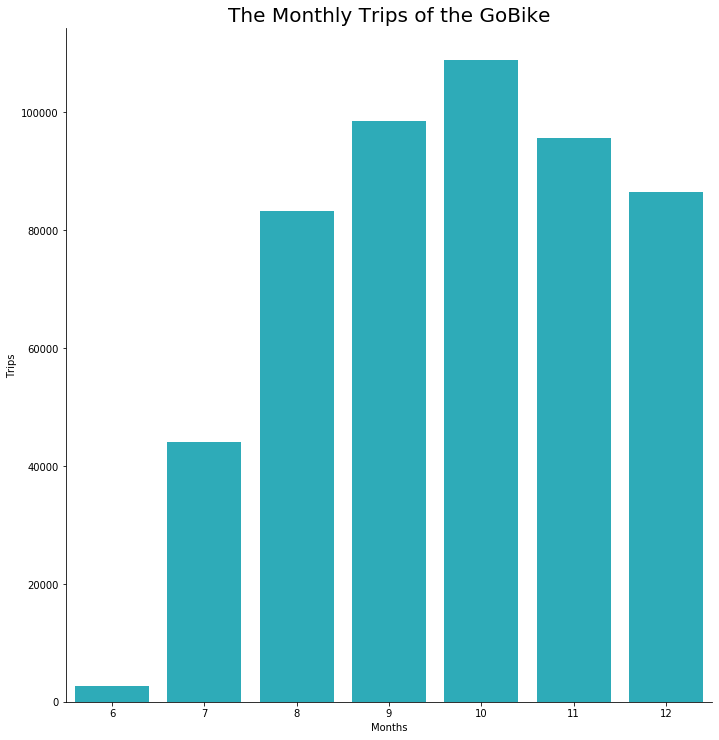

In [29]:
sb.catplot(data = df_bike_clean, x ='start_month', kind='count', color = color);
plt.gcf().set_size_inches(11, 11)
plt.title('The Monthly Trips of the GoBike',fontsize=20)
plt.xlabel('Months');
plt.ylabel('Trips');
plt.show()

>The highest rent rate Octber then September, then November, and lowest month in ranting the bikes is June.

In [30]:
df_bike_clean[df_bike_clean.duration_hr>5].duration_hr.count()

2942

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> for the plots that show the duration in seconds the maxumim was 3500 sec,but there are at lest 2942 rows with duration more then 5 hours.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, i did clean and change the type of some rows and added some cloumens like duration in hr, start month , start day, from start time and keep only the time in it , and distance, which are needed to understand the duration of rading the bikes.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

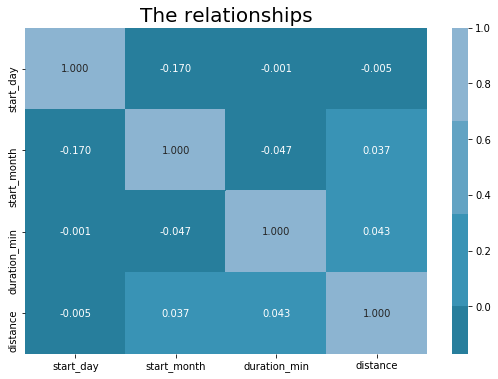

In [31]:
varbs = ['start_day','start_month','duration_min','distance']
plt.gcf().set_size_inches(9, 6)
sb.heatmap(df_bike_clean[varbs].corr(), annot = True, fmt = '.3f',cmap = (sb.color_palette("PuBuGn_d")), center = 0)
plt.title('The relationships',fontsize=20)
plt.show()

> The plot shows the relationships between the start_day , start_month , duration in min, and distance.

In [32]:
labels = ['Customer', 'Subscriber']
colors = ['LightGrey', 'PowderBlue']

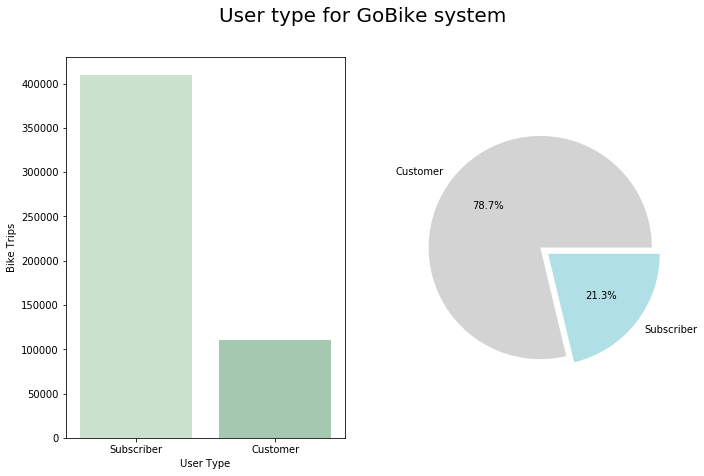

In [33]:
plt.subplot(1, 2, 1)
sb.countplot(data=df_bike_clean, x="user_type", order=df_bike_clean.user_type.value_counts().index, palette=sb.color_palette("ch:2.5,-.2,dark=.3"))
plt.gcf().set_size_inches(11,7)
plt.xlabel('User Type')
plt.ylabel('Bike Trips')

plt.subplot(1, 2, 2)
plt.suptitle('User type for GoBike system', fontsize=20);
plt.pie(df_bike_clean.user_type.value_counts(), explode=(0.0,0.09), labels=labels, colors = ['LightGrey', 'PowderBlue'],
        autopct='%1.1f%%')
plt.show()

>the plots show that 21.3% of the users are Subscriber, and the other 78.7% are Customer

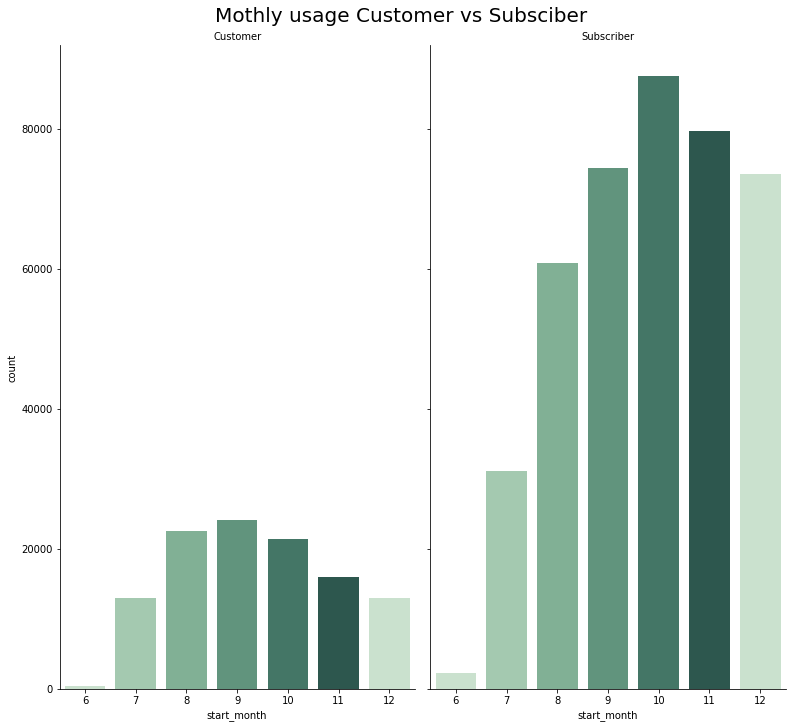

In [34]:
g=sb.catplot(data=df_bike_clean, x='start_month', col="user_type", kind='count', 
            palette=sb.color_palette("ch:2.5,-.2,dark=.3"))
plt.gcf().set_size_inches(11,11)
g.set_titles("{col_name}")
plt.suptitle('Mothly usage Customer vs Subsciber', fontsize=20);
plt.show()

 from the plot above shows:
 >the Subscribers,the usege is mostly in Octber,and November.

>Customes the usege is mostly in September,Augest, and Octber, the less month to rent bikes for both thype of users is June.

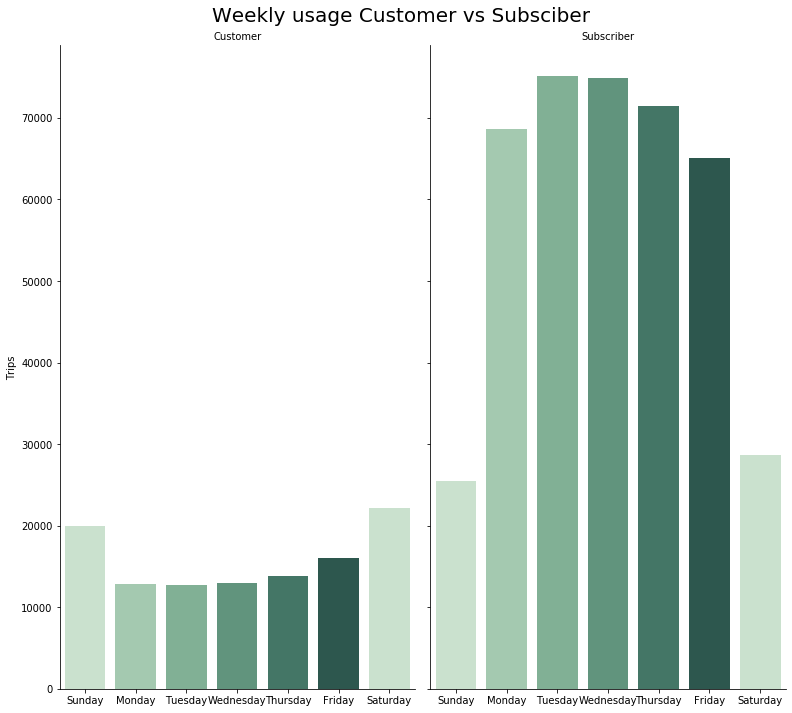

In [35]:
g = sb.catplot(data = df_bike_clean, x='start_weekday', col="user_type", kind='count', palette=sb.color_palette("ch:2.5,-.2,dark=.3"), order = weekday)
plt.gcf().set_size_inches(11,11)
g.set_axis_labels("", "Trips")
g.set_titles("{col_name}")
plt.suptitle('Weekly usage Customer vs Subsciber', fontsize=20);

 The plot above shows: 
 >the Subscribers, the usege is mostly in the weekdays, and Customes the usege is mostly in the weekends.

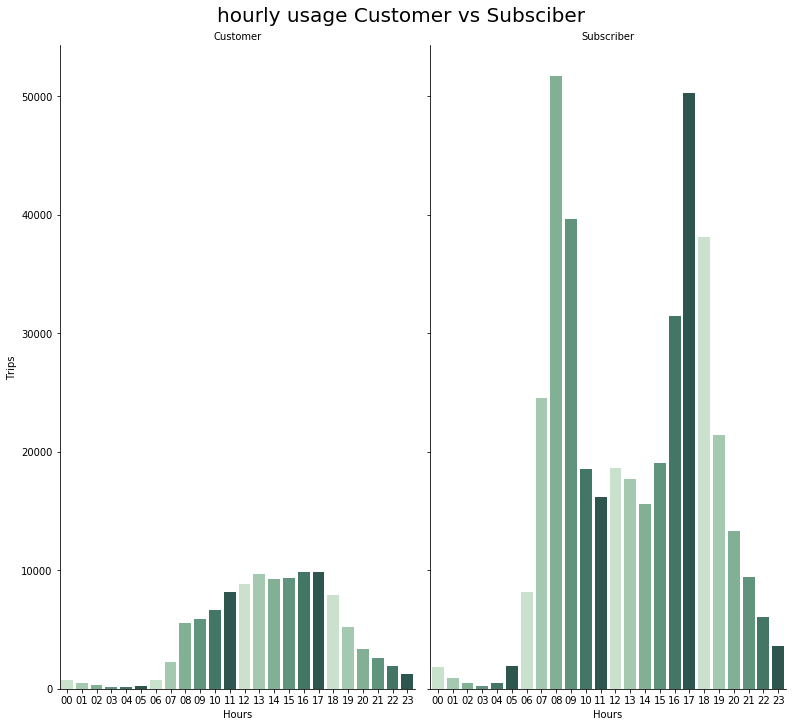

In [36]:
g = sb.catplot(data = df_bike_clean, x='start_hour', col="user_type", kind='count', palette=sb.color_palette("ch:2.5,-.2,dark=.3"))
plt.gcf().set_size_inches(11,11)
g.set_axis_labels("Hours", "Trips")
g.set_titles("{col_name}")
plt.suptitle('hourly usage Customer vs Subsciber', fontsize=20);


 The plot above shows: 
 >the Subscribers the usege is mostly at 8AM and 5PM , and Customes the usege is mostly between 11AM - 5PM.

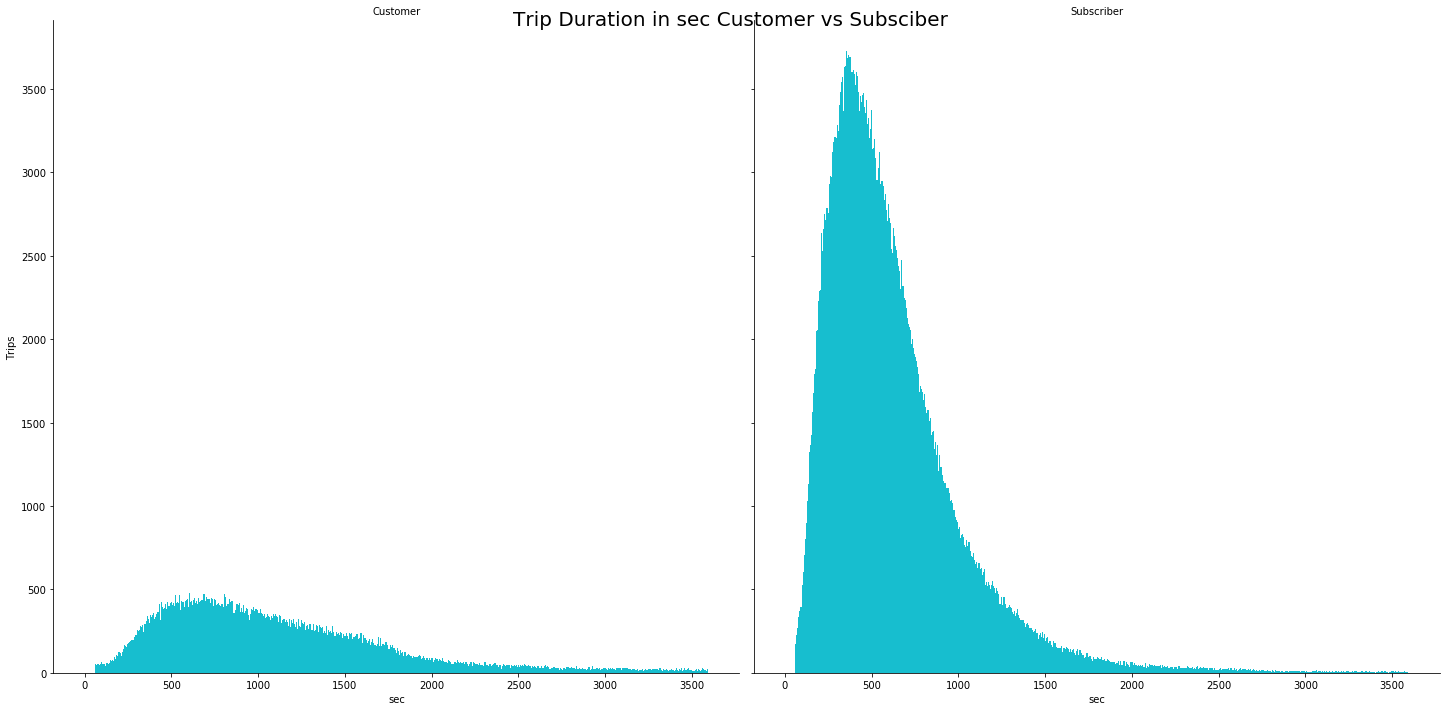

In [37]:
g = sb.FacetGrid(data = df_bike_clean, col="user_type",height = 10)

g.map(plt.hist,'duration_sec', bins = np.arange(0, 3600, 6), color = color)
g.set_axis_labels("sec", "Trips")
g.set_titles("{col_name}")
plt.suptitle('Trip Duration in sec Customer vs Subsciber', fontsize=20);

the plot shows that the trip duration are longer for custmers 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> using the user type in the analysis showd the diffrent behaiver of the two users types.

**Customes:**
> the usege is mostly between 11AM - 5PM, the usege is mostly in the weekends,the usege is mostly in September,Augest, and Octber, trips seems long.

**Subscribers:** 
>the usege is mostly at 8AM and 5PM , and Customes the usege is mostly between 11AM - 5PM the usege is mostly in the weekdays,the usege is mostly in Octber,and November.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Subscribers who use the system are more then the the Customes, and Subscribers trips mostly shorter than customer trips and revolve around wrok times.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

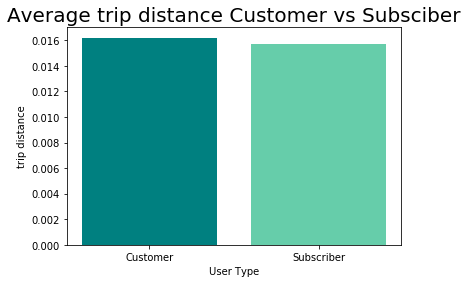

In [67]:
distance=df_bike_clean.groupby('user_type').distance.mean()
plt.bar(distance.index,distance, color=['Teal','MediumAquaMarine'])

plt.title('Average trip distance Customer vs Subsciber', fontsize=20)
plt.ylabel('trip distance')
plt.xlabel('User Type')

plt.show()

>the plot shows that the average trip distance for Customer and subscriber trips, but Customer trip distance is little higher

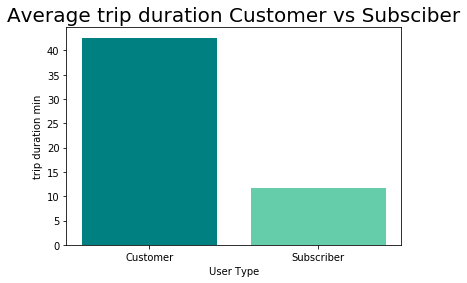

In [57]:
x=df_bike_clean.groupby('user_type').duration_min.mean()
plt.bar(x.index,x, color=['Teal','MediumAquaMarine'])

plt.title('Average trip duration Customer vs Subsciber', fontsize=20)
plt.ylabel('trip duration min')
plt.xlabel('User Type')

plt.show()

>the plot shows that the average trip duration for Customer higher than the average of subscriber trips  

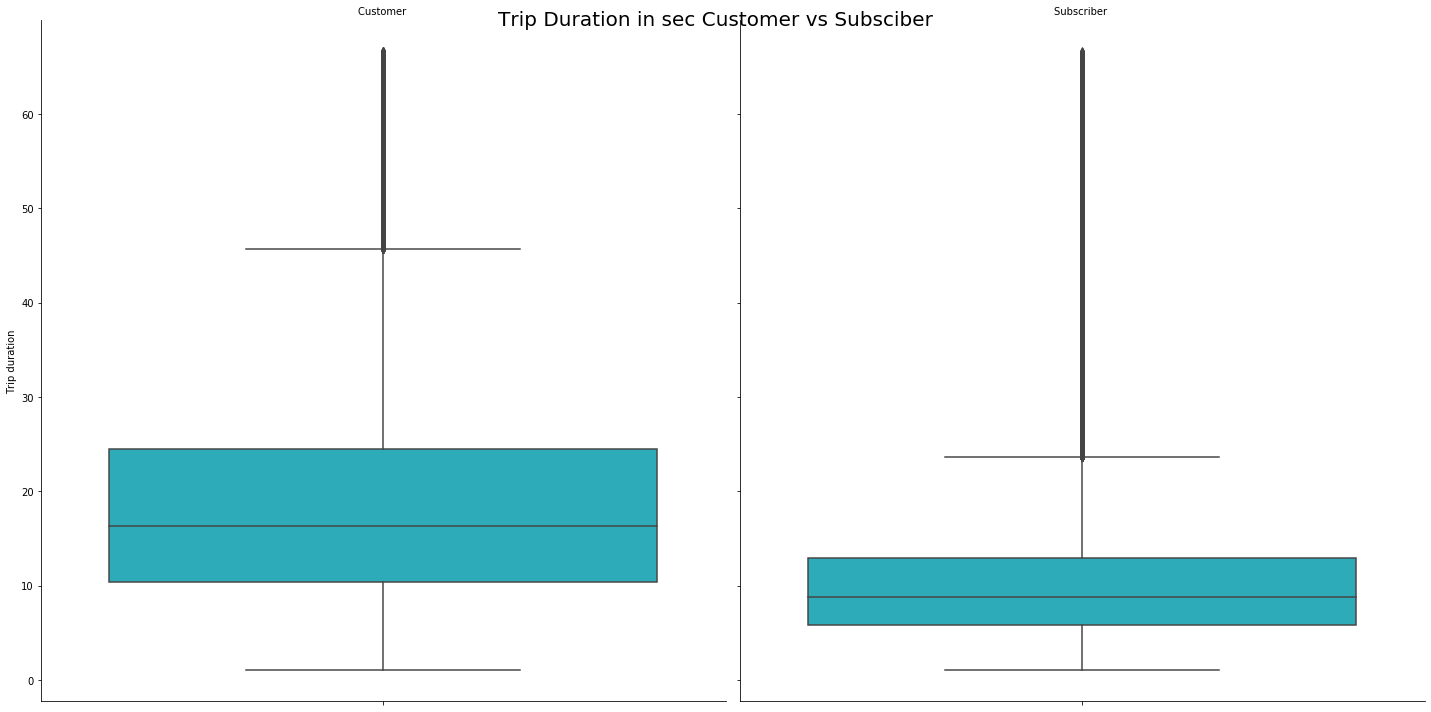

In [86]:
g=sb.catplot(data=df_bike_clean.query('duration_sec < 4000'), y='duration_min', col="user_type", kind='box',color = color,height = 10)
g.set_axis_labels("", "Trip duration")
g.set_titles('{col_name} ')
plt.suptitle('Trip Duration in sec Customer vs Subsciber', fontsize=20);

>the plot shows that the average trip duration for Customer higher than the average of subscriber trips 

In [92]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 23 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
duration_min               519700 non-null float64
duration_hr                519700 non-null float64
start_month                519700 non-null int64
start_month_name           519700 non-null object
start_day                  519700 non-

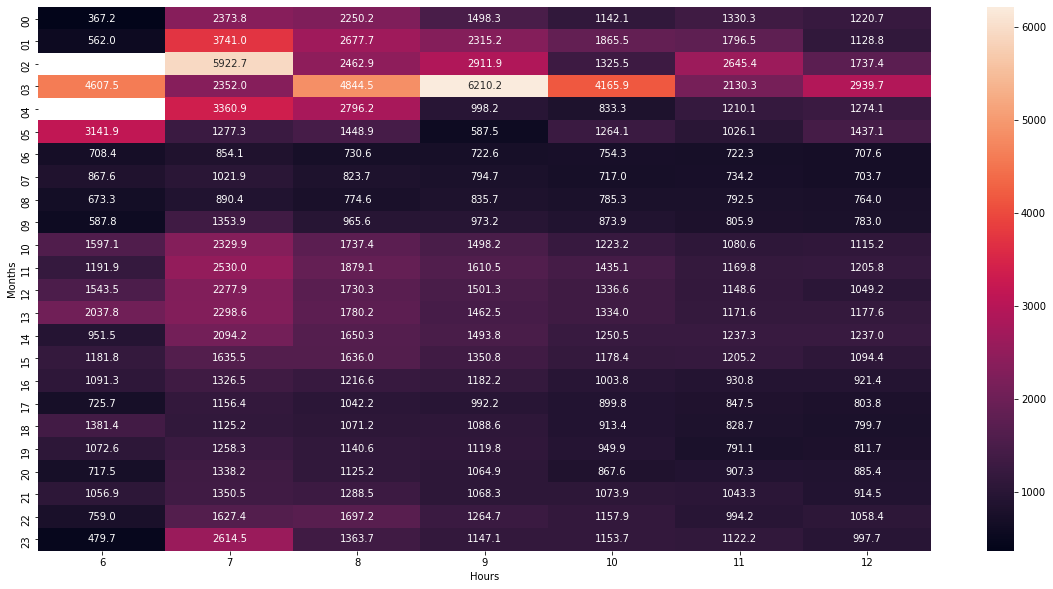

In [105]:
fig, ax = plt.subplots(figsize=(20,10))

trips = df_bike_clean.pivot_table(index='start_hour', columns='start_month',values='duration_sec' )
sb.heatmap(trips, annot=True,fmt=".1f")
plt.ylabel('Months')
plt.xlabel('Hours')
plt.show()

this plot shows the duration in the months and hours

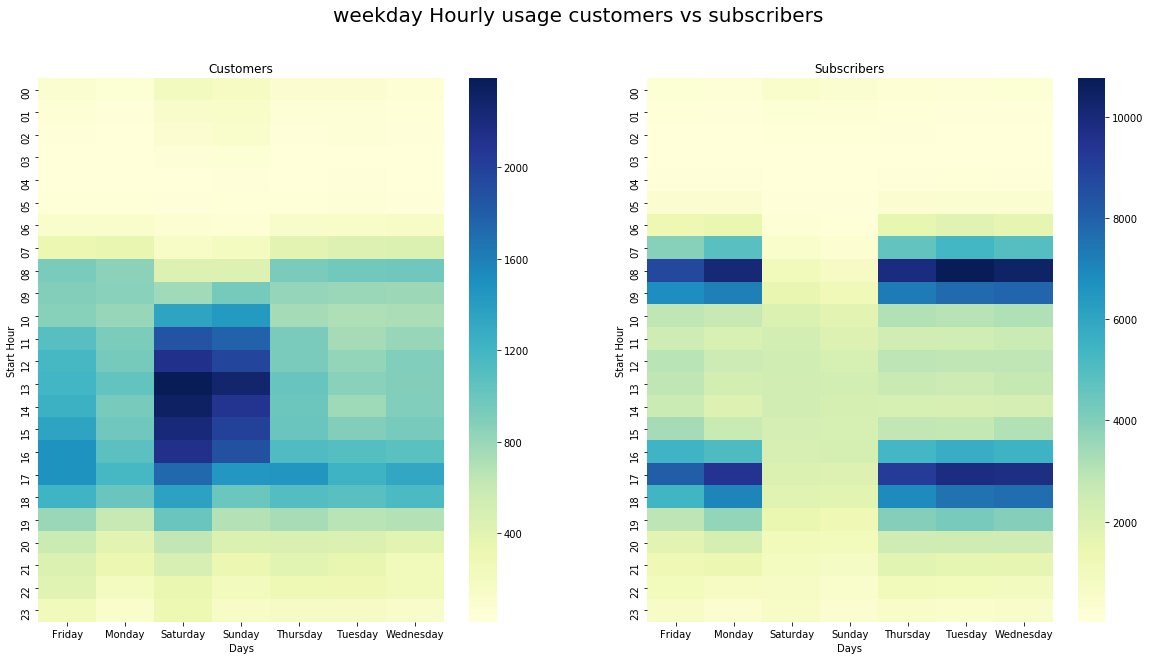

In [119]:
plt.subplots(figsize=(20,10))
plt.suptitle('weekday Hourly usage customers vs subscribers', fontsize=20)
plt.subplot(1, 2, 1)
df_customer = df_bike_clean.query('user_type == "Customer"').groupby(["start_hour", "start_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_hour", "start_weekday", "bike_id")

sb.heatmap(df_customer, cmap="YlGnBu")
plt.title("Customers")
plt.xlabel('Days')
plt.ylabel('Start Hour')

plt.subplot(1, 2, 2)
df_customer = df_bike_clean.query('user_type == "Subscriber"').groupby(["start_hour", "start_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_hour", "start_weekday", "bike_id")

sb.heatmap(df_customer, cmap="YlGnBu")
plt.title("Subscribers")
plt.xlabel('Days')
plt.ylabel('Start Hour')
plt.show()

Customers:
>Weekend: the usege is mostly is at 8AM and 5PM in and the peek is Friday.

>Weekdays: the usege is mostly is at 10AM - 5PM in the Weekend and sturday at 1PM - 2PM is the peek.

Subscriber:
>Weekend: the usege is mostly is at 8AM and 5PM in and the peek is Tuesday.

>Weekdays: there are a big drop in the system usege comperied to the weekdays.

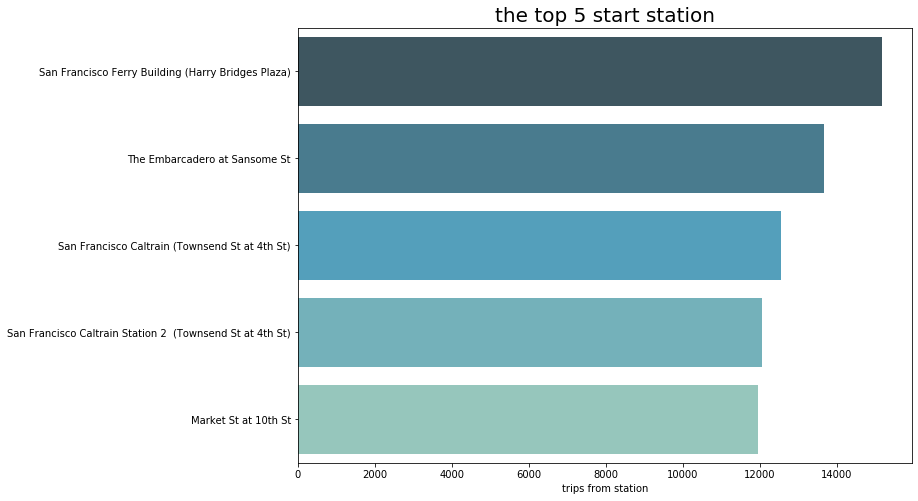

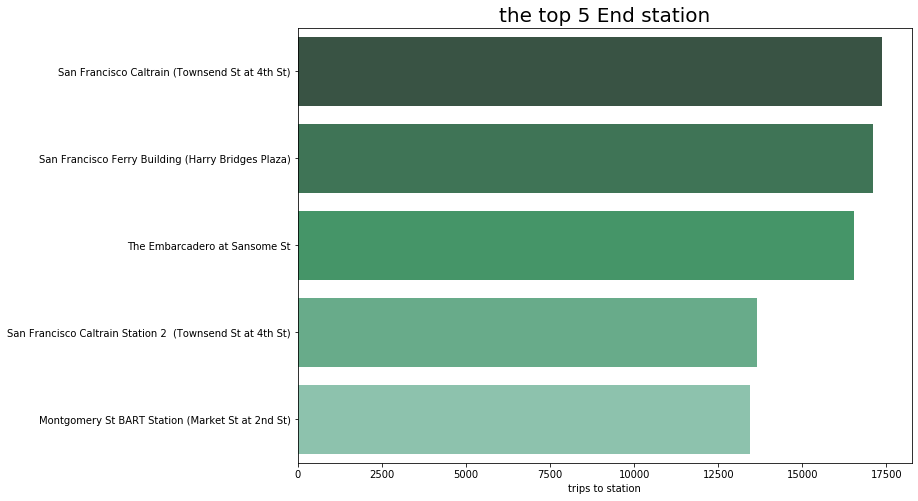

In [65]:
plt.figure(figsize=(11,8))
sb.barplot(y=df_bike_clean.start_station_name.value_counts().head().index, x = df_bike_clean.start_station_name.value_counts().head(), orient='h',palette='GnBu_d')
plt.title('the top 5 start station', fontsize=20)
plt.xlabel('trips from station')
plt.show()

plt.figure(figsize=(11,8))
sb.barplot(y=df_bike_clean.end_station_name.value_counts().head().index, x = df_bike_clean.end_station_name.value_counts().head(), orient='h',palette='BuGn_d')

plt.title('the top 5 End station', fontsize=20)
plt.xlabel('trips to station')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The heatmap show the hight domand through each day and give new informations about the the users behaviors. like the 8-9 am and 5-6 PM week days for Subscribers and the Customer who most likly to bike in the weekends .


### Were there any interesting or surprising interactions between features?

> there is the peek in 2 PM Saturday for Customers, and the significant drop of rented bikes in the weekend for Subscribers, those were not visible before. 

In [120]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

0

In [121]:
df_bike_clean.to_csv('master.csv', index = False)

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!